In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv("bank.csv")
print(data)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no   1787.0      no   no   
1      33       services  married  secondary      no   4789.0     yes  yes   
2      35     management   single   tertiary      no   1350.0     yes   no   
3      30     management  married   tertiary      no   1476.0     yes  yes   
4      59    blue-collar  married  secondary      no      0.0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no   -333.0     yes   no   
4517   57  self-employed  married   tertiary     yes  -3313.0     yes  yes   
4518   57     technician  married  secondary      no    295.0      no   no   
4519   28    blue-collar  married  secondary      no   1137.0      no   no   
4520   44   entrepreneur   single   tertiary      no   1136.0     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [4]:
df=data.copy()

In [5]:
df.head()
# df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,NaN,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,NaN,-1,0,unknown,no


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
df.columns = df.columns.str.title()
df

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,NaN,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,NaN,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329,5.0,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153,1.0,-1,0,unknown,no
4518,57,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151,11.0,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129,4.0,211,3,other,no


In [8]:
df.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing',
       'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign', 'Pdays',
       'Previous', 'Poutcome', 'Y'],
      dtype='object')

In [9]:
df.rename(columns={'Marital' : 'Marital_Status',
                  'Pdays' : 'Days_Since_Last_Contact',
                  'Poutcome' : 'Previous_Outcome',
                  'Y' : 'Customer_Subscription'}, inplace=True)

In [10]:
df.shape   #rows,columns

(4521, 17)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4521 non-null   int64  
 1   Job                      4521 non-null   object 
 2   Marital_Status           4521 non-null   object 
 3   Education                4521 non-null   object 
 4   Default                  4521 non-null   object 
 5   Balance                  4495 non-null   float64
 6   Housing                  4521 non-null   object 
 7   Loan                     4521 non-null   object 
 8   Contact                  4521 non-null   object 
 9   Day                      4521 non-null   int64  
 10  Month                    4521 non-null   object 
 11  Duration                 4521 non-null   int64  
 12  Campaign                 4442 non-null   float64
 13  Days_Since_Last_Contact  4521 non-null   int64  
 14  Previous                

In [12]:
df.describe()

,Age,Balance,Day,Duration,Campaign,Days_Since_Last_Contact,Previous
count,4521.000000,4495.000000,4521.000000,4521.000000,4442.000000,4521.000000,4521.000000
mean,41.170095,1423.153504,15.915284,263.961292,2.804818,39.766645,0.542579
std,10.576211,3015.932038,8.247667,259.856633,3.123293,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,443.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1474.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [13]:
df.describe(include="all")

,Age,Job,Marital_Status,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Days_Since_Last_Contact,Previous,Previous_Outcome,Customer_Subscription
count,4521.000000,4521,4521,4521,4521,4495.000000,4521,4521,4521,4521.000000,4521,4521.000000,4442.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1423.153504,NaN,NaN,NaN,15.915284,NaN,263.961292,2.804818,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3015.932038,NaN,NaN,NaN,8.247667,NaN,259.856633,3.123293,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,443.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1474.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


 ## **Data Cleaning**


In [14]:
df.dtypes

Age                          int64
Job                         object
Marital_Status              object
Education                   object
Default                     object
Balance                    float64
Housing                     object
Loan                        object
Contact                     object
Day                          int64
Month                       object
Duration                     int64
Campaign                   float64
Days_Since_Last_Contact      int64
Previous                     int64
Previous_Outcome            object
Customer_Subscription       object
dtype: object

In [15]:
df['Job'] = df['Job'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Default'] = df['Default'].astype('category')
df['Housing'] = df['Housing'].astype('category')
df['Loan'] = df['Loan'].astype('category')
df['Contact'] = df['Contact'].astype('category')
df['Month'] = df['Month'].astype('category')
df['Previous_Outcome'] = df['Previous_Outcome'].astype('category')
df['Customer_Subscription'] = df['Customer_Subscription'].astype('category')

In [16]:
df.dtypes

Age                           int64
Job                        category
Marital_Status             category
Education                  category
Default                    category
Balance                     float64
Housing                    category
Loan                       category
Contact                    category
Day                           int64
Month                      category
Duration                      int64
Campaign                    float64
Days_Since_Last_Contact       int64
Previous                      int64
Previous_Outcome           category
Customer_Subscription      category
dtype: object

In [17]:
df.nunique()

Age                          67
Job                          12
Marital_Status                3
Education                     4
Default                       2
Balance                    2345
Housing                       2
Loan                          2
Contact                       3
Day                          31
Month                        12
Duration                    875
Campaign                     32
Days_Since_Last_Contact     292
Previous                     24
Previous_Outcome              4
Customer_Subscription         2
dtype: int64

In [18]:
df_duplicated = df.duplicated()
print(df_duplicated)

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool


In [19]:
df.duplicated().sum()

0

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df['Job'].value_counts(normalize=True,ascending=True)

Job
unknown          0.008405
student          0.018580
housemaid        0.024773
unemployed       0.028312
entrepreneur     0.037160
self-employed    0.040478
retired          0.050874
services         0.092236
admin.           0.105729
technician       0.169874
blue-collar      0.209246
management       0.214333
Name: proportion, dtype: float64

In [22]:
df.isnull().sum()

Age                         0
Job                         0
Marital_Status              0
Education                   0
Default                     0
Balance                    26
Housing                     0
Loan                        0
Contact                     0
Day                         0
Month                       0
Duration                    0
Campaign                   79
Days_Since_Last_Contact     0
Previous                    0
Previous_Outcome            0
Customer_Subscription       0
dtype: int64

In [23]:
(df.isnull().sum()/len(df))*100

Age                        0.000000
Job                        0.000000
Marital_Status             0.000000
Education                  0.000000
Default                    0.000000
Balance                    0.575094
Housing                    0.000000
Loan                       0.000000
Contact                    0.000000
Day                        0.000000
Month                      0.000000
Duration                   0.000000
Campaign                   1.747401
Days_Since_Last_Contact    0.000000
Previous                   0.000000
Previous_Outcome           0.000000
Customer_Subscription      0.000000
dtype: float64

In [24]:
df['Balance']

0       1787.0
1       4789.0
2       1350.0
3       1476.0
4          0.0
         ...  
4516    -333.0
4517   -3313.0
4518     295.0
4519    1137.0
4520    1136.0
Name: Balance, Length: 4521, dtype: float64

In [25]:
df['Balance'].mode()

0    0.0
Name: Balance, dtype: float64

In [26]:
df_Balance = df['Balance'].mean()
df['Balance'] = df['Balance'].fillna(df_Balance)
df['Balance'].isnull().sum()

0

In [27]:
df['Campaign'].unique()

array([ 1., nan,  2.,  4.,  3.,  5.,  6., 10.,  9.,  7., 12., 14., 13.,
       24., 11.,  8., 29., 32., 16., 22., 18., 15., 30., 25., 21., 17.,
       19., 23., 20., 50., 28., 31., 44.])

In [28]:
df['Campaign'].mode()

0    1.0
Name: Campaign, dtype: float64

In [29]:
df['Campaign'] = df['Campaign'].fillna(df['Campaign'].mode()[0])
#using [0] extracts the first (and typically only) mode value to fill the missing values 

In [30]:
df['Campaign'].isnull().sum()

0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4521 non-null   int64   
 1   Job                      4521 non-null   category
 2   Marital_Status           4521 non-null   category
 3   Education                4521 non-null   category
 4   Default                  4521 non-null   category
 5   Balance                  4521 non-null   float64 
 6   Housing                  4521 non-null   category
 7   Loan                     4521 non-null   category
 8   Contact                  4521 non-null   category
 9   Day                      4521 non-null   int64   
 10  Month                    4521 non-null   category
 11  Duration                 4521 non-null   int64   
 12  Campaign                 4521 non-null   float64 
 13  Days_Since_Last_Contact  4521 non-null   int64   
 14  Previous

# **Questions**


1. **How many married individuals are unemployed?**  
2. **What is the average age of individuals who subscribed to the term deposit versus those who did not?**  
3. **How does the average balance of customers change depending on the month they were contacted by the bank?**  
4. **How does the average duration of customer calls vary by month?**  
5. **What is the distribution of marital status (married, unmarried, divorced) across different education levels?**  


In [32]:
df.columns

Index(['Age', 'Job', 'Marital_Status', 'Education', 'Default', 'Balance',
       'Housing', 'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign',
       'Days_Since_Last_Contact', 'Previous', 'Previous_Outcome',
       'Customer_Subscription'],
      dtype='object')

## **Data Visualization**

1. ## **How many married individuals are unemployed?** 

In [33]:
df['Marital_Status'].unique()

['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']

In [34]:
#filter the dataset for married individuals who are unemployed
married_unemployed =df[(df['Marital_Status'] == 'married') & (df['Job'] == 'unemployed')]

#count the number of married unemployed individuals
count_married_unemployed = married_unemployed.shape[0]
print("Number of married unemployed individuals:",count_married_unemployed)

Number of married unemployed individuals: 75


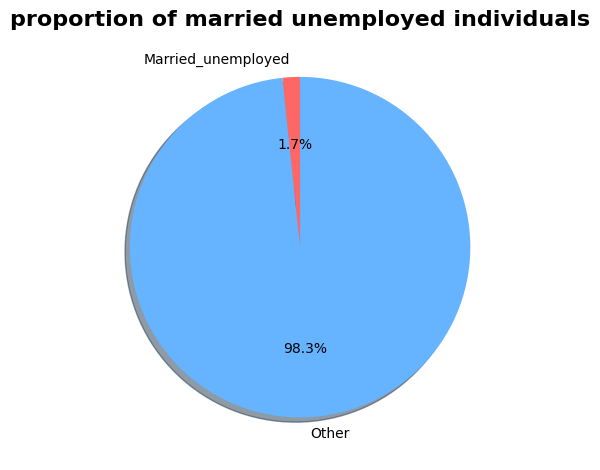

In [55]:
sizes = [count_married_unemployed, df.shape[0] - count_married_unemployed]
plt.pie(sizes, labels=['Married_unemployed','Other'], colors=['#ff6666','#66b3ff'], 
        autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('proportion of married unemployed individuals', fontsize=16, 
          fontweight='bold')

plt.savefig("Chart1.png",bbox_inches='tight',dpi=300)
plt.tight_layout()
plt.show()

## **Report**
The analysis identified number of married unemployed individual in the dataset by filtering for married individuals with an 'unemployed' job status. The result is visualized using pie chart to show the proportion of married unemployed individual compared to the rest. The chart highlights that a small subset of the population falls into this category. This provides insights into the distribution of employment status among married individuals. The visualization aids in understanding the relationship between marital status and employment.

## **2. What is the average age of individuals who subscribed to the term deposit versus those who did not?**

In [36]:
df['Customer_Subscription'].unique()

['no', 'yes']
Categories (2, object): ['no', 'yes']

In [37]:
# calculate the average age for both groups: subscribed and unsubscribed 
avg_age_subscribed = df[df['Customer_Subscription'] == 'yes']['Age'].mean()
avg_age_not_subscribed = df[df['Customer_Subscription'] == 'no']['Age'].mean()

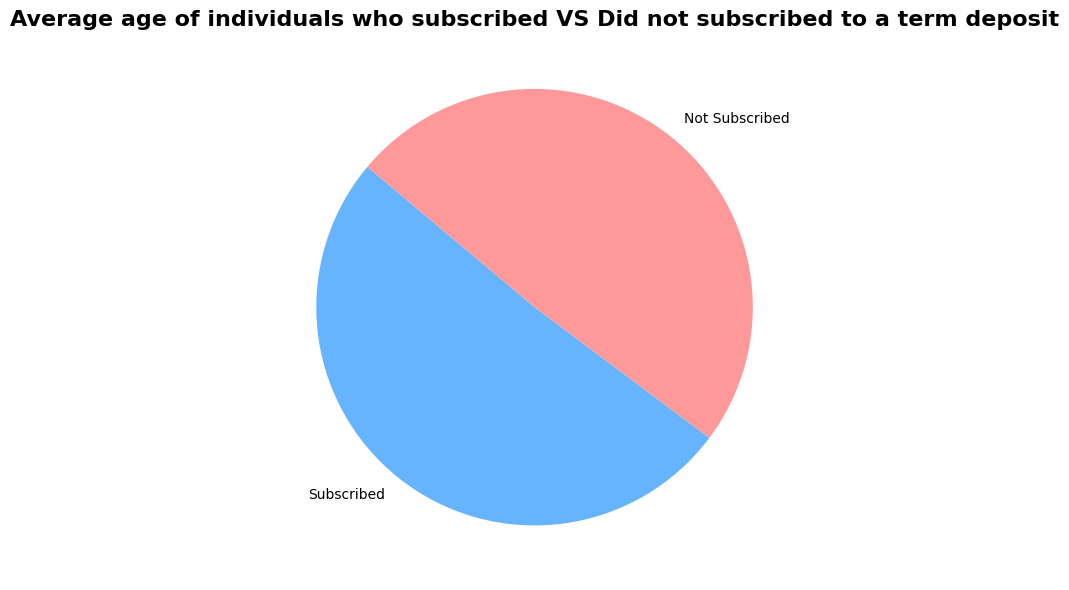

In [54]:
labels = ['Subscribed','Not Subscribed']
avg_ages = [avg_age_subscribed , avg_age_not_subscribed]

plt.figure(figsize=(10,6))
plt.pie(avg_ages, labels=labels, startangle=140, colors=['#66b3ff','#ff9999'])

plt.title('Average age of individuals who subscribed VS Did not subscribed to a term deposit',fontsize = 16, fontweight = 'bold')

plt.savefig("Chart2.png",bbox_inches='tight',dpi=300)
plt.tight_layout()
plt.show()

## **Report**
The analysis compares the average age of individuals who subscribed and those who did not to a term deposit using a pie chart. The chart highlights the demographic differences between the two groups. It shows that individuals who subscribed have a distinct average age compared to those who did not. This information can help refine marketing strategies targeted at specific age groups. The visualization provides a clear view of the age distribution in relation to term deposit subscriptions.

## **3. How does the average balance of customers change depending on the month they were contacted by the bank?**

In [39]:
# group by 'Month' and calculate the average balance for each month
avg_balance_per_month = df.groupby('Month')['Balance'].mean()
print(avg_balance_per_month)

Month
apr    1654.243369
aug    1457.211323
dec    3567.150000
feb    1321.461534
jan     985.832118
jul     794.740464
jun    1887.296536
mar    2049.530612
may    1102.989819
nov    2593.759144
oct    2738.650000
sep    1589.346154
Name: Balance, dtype: float64


C:\Users\vandanpatel\AppData\Local\Temp\ipykernel_10172\3074901001.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_balance_per_month = df.groupby('Month')['Balance'].mean()


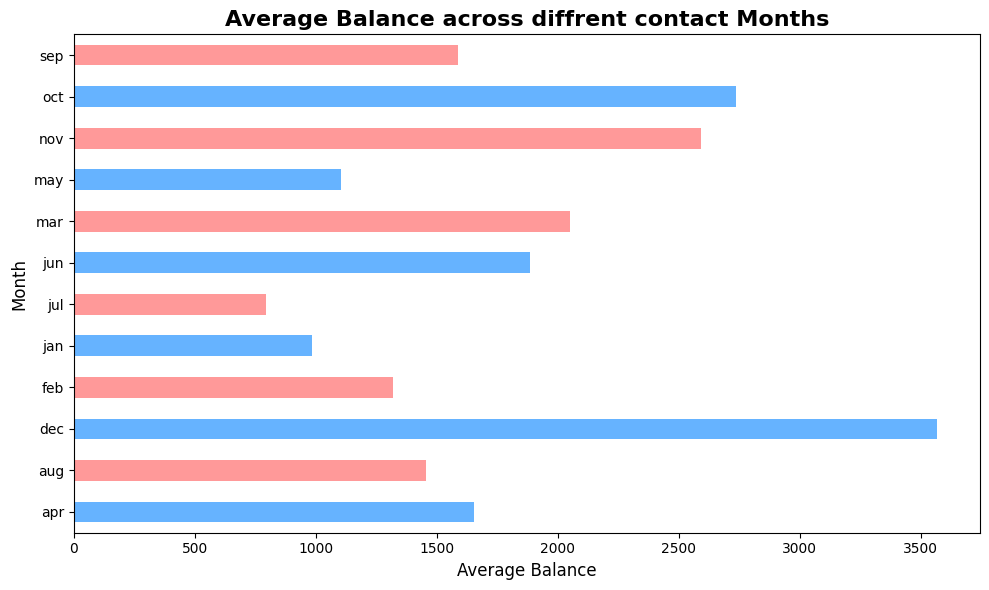

In [53]:
plt.figure(figsize=(10,6))
avg_balance_per_month.plot(kind='barh', color=['#66b3ff','#ff9999','#66b3ff','#ff9999','#66b3ff','#ff9999','#66b3ff','#ff9999','#66b3ff','#ff9999','#66b3ff','#ff9999',])

plt.title('Average Balance across diffrent contact Months',fontsize=16, fontweight='bold')
plt.ylabel('Month',fontsize=12)
plt.xlabel('Average Balance',fontsize=12)

plt.savefig("Chart3.png",bbox_inches='tight',dpi=300)
plt.tight_layout()
plt.show()

## **Report**
The analysis shows how the average balance varies across different contact months using a horizontal bar chart. The chart reveals fluctuations in average balance throughout the months, with some months having higher average balances than others. These variations might be linked to seasonal factors or marketing campaigns. The visualization provides insights into customer behavior and financial patterns, which could inform targeted marketing strategies. It also highlights months with significant changes in customer balances.

## **4. How does the average duration of customer calls vary by month?**

In [41]:
# group by 'Month' and calculate the average duration of customer calls for each month
avg_duration_per_month = df.groupby('Month')['Duration'].mean()

C:\Users\vandanpatel\AppData\Local\Temp\ipykernel_10172\2251361688.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_duration_per_month = df.groupby('Month')['Duration'].mean()


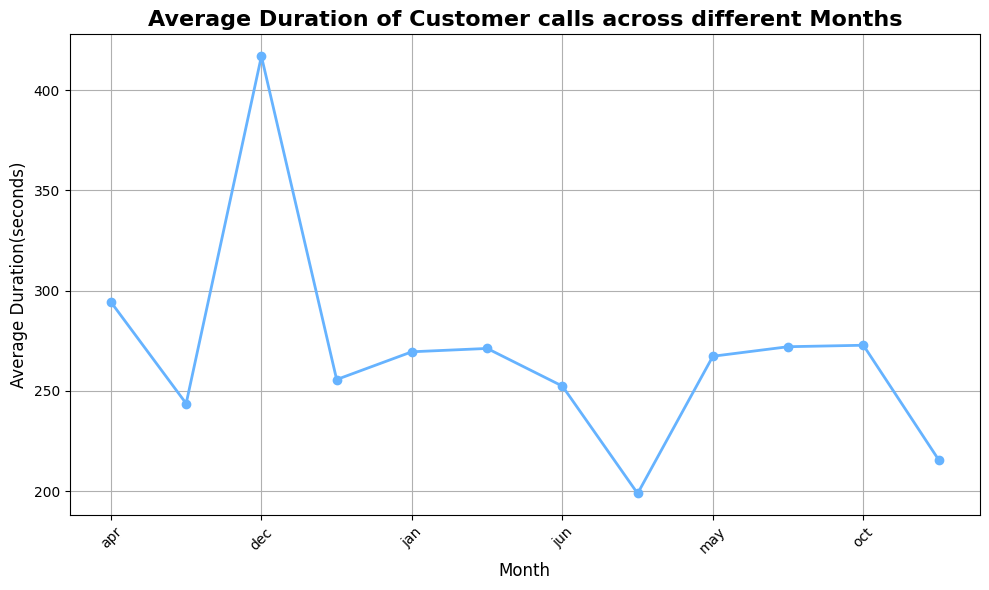

In [52]:
plt.figure(figsize=(10,6))
avg_duration_per_month.plot(kind='line', marker='o', color='#66b3ff', linestyle='-', linewidth=2)

plt.title('Average Duration of Customer calls across different Months', fontsize=16, fontweight='bold')
plt.ylabel('Average Duration(seconds)',fontsize=12)
plt.xlabel('Month',fontsize=12)

plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("Chart4.png",bbox_inches='tight',dpi=300)
plt.tight_layout()
plt.show()

## **Report**
The analysis shows how the average duration of customer calls varies across different months. The line chart indicates fluctuations in call duration over the year. Some months show longer call durations, while others have shorter averages. This trend could reflect seasonal marketing efforts or customer engagement patterns. The visualization helps understand how call durations change over time, which can be useful for evaluating the effectiveness of campaigns or customer service performance.

## **5. What is the distribution of marital status (married, unmarried, divorced) across different education levels?**

In [47]:
# group by 'Marital_Status' and 'Education' to get the count of each marital status for each education level
education_marital_counts = df.groupby(['Education','Marital_Status']).size().unstack(fill_value=0)

C:\Users\vandanpatel\AppData\Local\Temp\ipykernel_10172\184167415.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_marital_counts = df.groupby(['Education','Marital_Status']).size().unstack(fill_value=0)


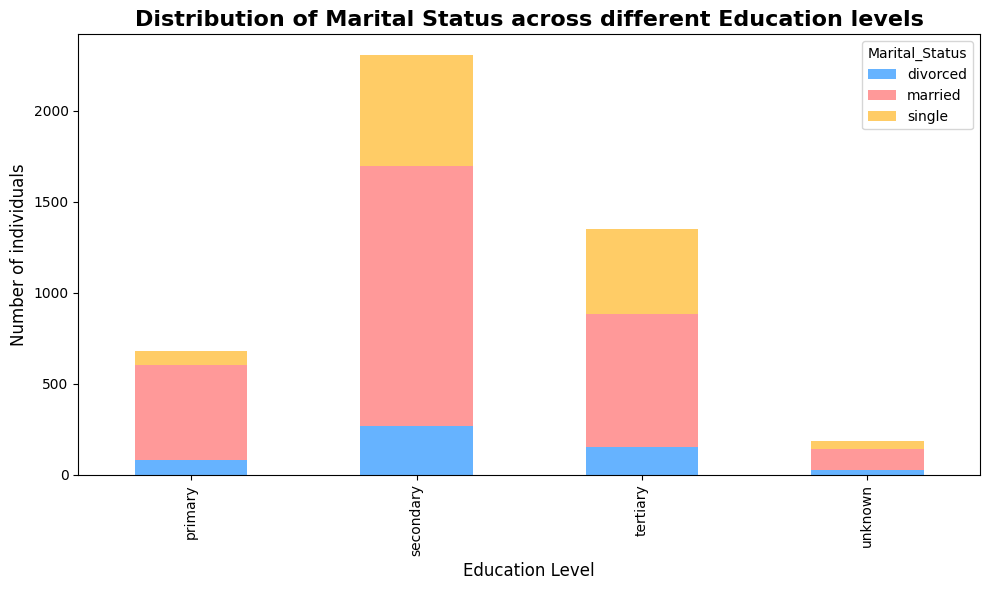

In [51]:
education_marital_counts.plot(kind='bar', stacked=True, color=['#66b3ff','#ff9999', '#ffcc66'], figsize=(10,6))

plt.title('Distribution of Marital Status across different Education levels', fontsize=16, fontweight='bold')
plt.ylabel('Number of individuals', fontsize=12)
plt.xlabel('Education Level', fontsize=12)

plt.savefig("Chart5.png",bbox_inches='tight',dpi=300)
plt.tight_layout()
plt.show()

## **Report**
The analysis visualizes the distribution of marital status across education levels. Higher education levels shows the more balanced marital status , while lower level have more single individuals. This highlights how marital status varies with education. The chart offers valuable insights for demographic analysis and marketing strategies.